# Chapter 14. Introduction to Multimedia Data
## Notebook for R

In [1]:
install.packages(c("magick", "glue","lsa",
    "tidyverse","dslabs","randomForest","caret",
    "tensorflow","keras"))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘config’, ‘reticulate’, ‘tfruns’


Warning message in install.packages(c("magick", "glue", "lda", "tidyverse", "dslabs", :
“installation of package ‘reticulate’ had non-zero exit status”
Warning message in install.packages(c("magick", "glue", "lda", "tidyverse", "dslabs", :
“installation of package ‘magick’ had non-zero exit status”
Warning message in install.packages(c("magick", "glue", "lda", "tidyverse", "dslabs", :
“installation of package ‘tfruns’ had non-zero exit status”
Warning message in install.packages(c("magick", "glue", "lda", "tidyverse", "dslabs", :
“installation of package ‘tensorflow’ had non-zero exit status”
Warning message in install.packages(c("magick", "glue", "lda", "tidyverse", "dslabs", :
“installation of package ‘keras’ had non-zero exit status”


In [29]:
library(magick)
library(lsa)
library(tidyverse)
library(dslabs)
library(randomForest)
library(caret)
library(tensorflow)
library(keras)

### 15.1 Storing, representing, and converting multimedia data

In [30]:
myimg1 = image_read(
    "https://cssbook.net/d/259_3_32_15.jpg")
myimg2 = image_read(
    "https://cssbook.net/d/298_5_52_15.png")
rbind(image_info(myimg1), image_info(myimg2))

format,width,height,colorspace,matte,filesize,density
<chr>,<int>,<int>,<chr>,<lgl>,<int>,<chr>
JPEG,805,453,sRGB,FALSE,75275,72x72
PNG,1540,978,sRGB,TRUE,2752059,57x57


In [31]:
myimg1_L = image_convert(myimg1,
                         colorspace = "gray")
print(class(myimg1_L))
myimg1_L_array = as.integer(myimg1_L[[1]])
print(class(myimg1_L_array))
print(dim(myimg1_L_array))


[1] "magick-image"
[1] "array"
[1] 453 805   1


In [32]:
myimg1_RGB = image_convert(myimg1,
                           colorspace = "RGB")
print(class(myimg1_RGB))
myimg1_RGB_array = as.integer(myimg1_RGB[[1]])
print(class(myimg1_RGB_array))
print(dim(myimg1_RGB_array))


[1] "magick-image"
[1] "array"
[1] 453 805   3


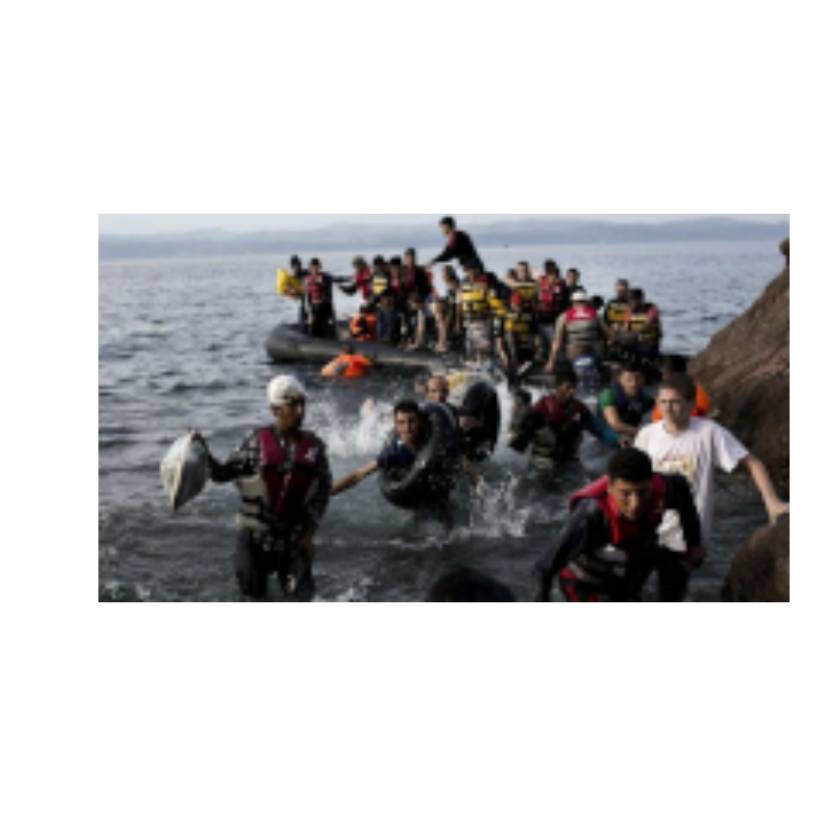

In [33]:
#Resize and visalize myimg1. Reduce to 25%
myimg1_RGB_25 = image_scale(myimg1_RGB,
        image_info(myimg1_RGB)["width"][[1]]*0.25)
plot(myimg1_RGB_25)

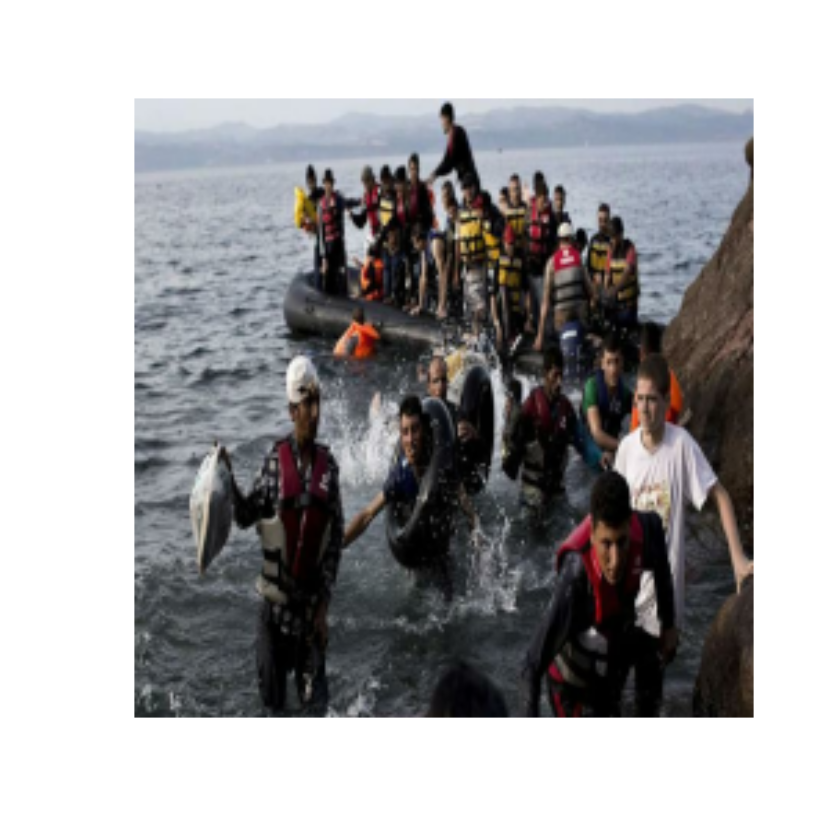

In [34]:
#Resize and visalize myimg1. Resize to 224 x 224
#! indicates to resize width and height exactly
myimg1_RGB_224 = image_scale(myimg1_RGB,
                             "!224x!224")
plot(myimg1_RGB_224)

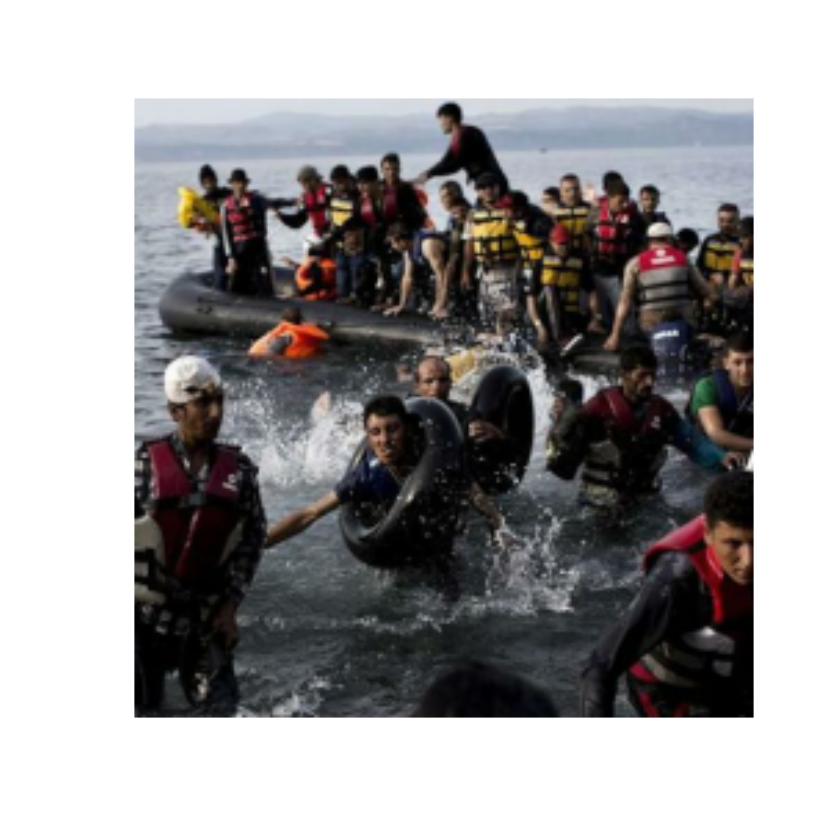

In [35]:
#Crop and resize to 224 x 224
#Create function
crop = function(img) {
    width = image_info(img)["width"][[1]]
    height = image_info(img)["height"][[1]]
    if (width > height) {
        return (image_crop(img, 
                sprintf("%dx%d+%d", height,
                    height, (width-height)/2)))
    }   else  {
        return (image_crop(img,
                sprintf("%sx%s+%s+%s", width,
        width, (width-width), (height-width)/2)))
        }
    }

myimg1_RGB_crop = crop(myimg1_RGB)
myimg1_RGB_crop_224 = image_scale(myimg1_RGB_crop,
                                  "!224x!224")
plot(myimg1_RGB_crop_224)

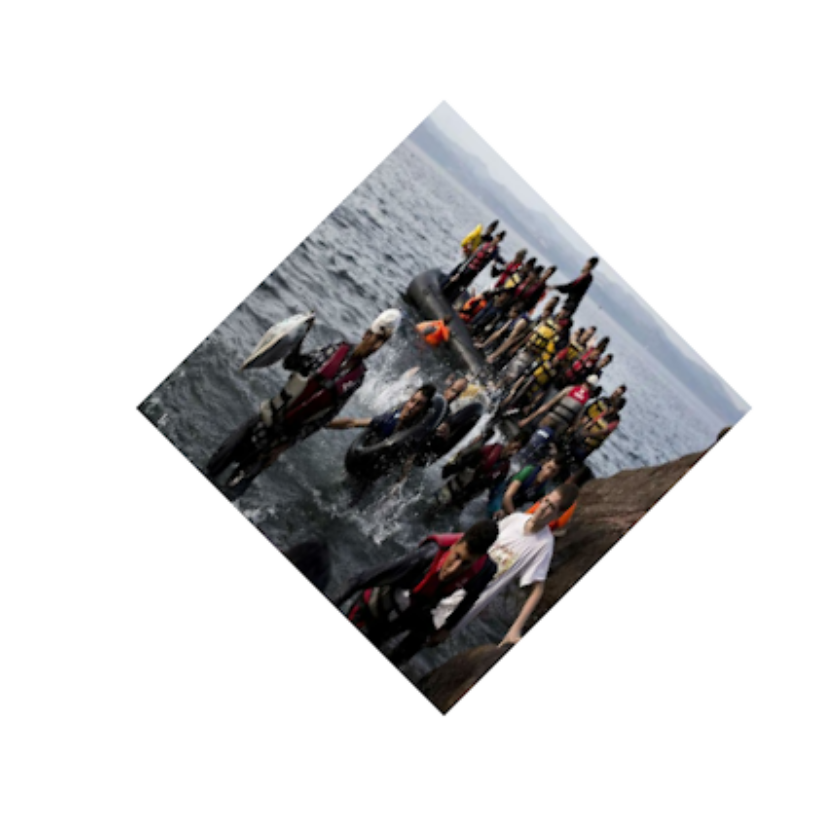

In [36]:
#Rotate 45 degrees
myimg1_RGB_224_rot = image_rotate(
    myimg1_RGB_224, 45)
plot(myimg1_RGB_224_rot)

In [37]:
#Create two 15x15 small images to compare

#image1
myimg1_RGB_crop_15 = image_scale(
    myimg1_RGB_crop_224, 15)
img_vect1 = as.integer(myimg1_RGB_crop_15[[1]])
img_vect1 = as.vector(img_vect1)

#image2
myimg2_RGB = image_convert(myimg2,
                           colorspace = "RGB")
myimg2_RGB_crop = crop(myimg2_RGB)
myimg2_RGB_crop_15 = image_scale(
    myimg2_RGB_crop, 15)
img_vect2 = as.integer(myimg2_RGB_crop_15[[1]])
#drop the extra channel for comparision
img_vect2 = img_vect2[,,-4] 
img_vect2 = as.vector(img_vect2)

matrix = cbind(img_vect1, img_vect2)

cosine(img_vect1, img_vect2)
cosine(matrix)

0.8987007


,img_vect1,img_vect2
img_vect1,1.0000000,0.8987007
img_vect2,0.8987007,1.0000000


### 15.2 Image classification

#### 15.2.1 Basic classification with shallow algorithms

In [38]:
mnist = read_mnist()

X_train = mnist$train$images
y_train = factor(mnist$train$labels)
X_test = mnist$test$images
y_test = factor(mnist$test$labels)

print("Shape = ")
dim(mnist$train$images)
print("Numbers in training set = ")
print(factor(y_train[1:10]), max.levels = 0)
print("Numbers in test set = ")
print(factor(y_test[1:10]), max.levels = 0)

[1] "Shape = "


[1] 60000   784

[1] "Numbers in training set = "
 [1] 5 0 4 1 9 2 1 3 1 4
[1] "Numbers in test set = "
 [1] 7 2 1 0 4 1 4 9 5 9


In [11]:
#Multiclass classification with RandomForest
rf_clf = randomForest(X_train, y_train, ntree=100)
rf_clf
predict(rf_clf, X_test[1:10,])
predictions = predict(rf_clf, X_test)
cm = confusionMatrix(predictions, y_test)
print(cm$overall["Accuracy"])


Call:
 randomForest(x = X_train, y = y_train, ntree = 100) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 28

        OOB estimate of  error rate: 3.47%
Confusion matrix:
     0    1    2    3    4    5    6    7    8    9 class.error
0 5846    2    6    6    4    8   23    1   25    2  0.01300017
1    0 6630   35   14   13    9    4   12   13   12  0.01661228
2   29    9 5763   24   28    4   14   39   38   10  0.03272910
3    5   11   96 5807    4   62    5   55   60   26  0.05284619
4    8   12   12    2 5656    1   25   11   13  102  0.03183841
5   19    5   10   76    8 5189   42    7   36   29  0.04279653
6   25   10    7    1   12   39 5806    0   18    0  0.01892531
7    6   20   56   10   36    1    0 6058   13   65  0.03304070
8   12   26   39   56   33   54   33    7 5533   58  0.05434968
9   21   13   13   62   79   25    5   57   46 5628  0.05395865

1  2  3  4  5  6  7  8  9 10 
 7  2  1  0  4  1  4  9  5  9 
Levels: 0 1 2 3 4 5 6 7 8 9

Accuracy 
   0.971 


#### 15.2.1 Deep Learning for Image Analysis

In [39]:
fashion_mnist <- dataset_fashion_mnist()
c(X_train, y_train) %<-% fashion_mnist$train
c(X_test, y_test) %<-% fashion_mnist$test

class_names = c("T-shirt/top","Trouser", 
    "Pullover","Dress", "Coat", "Sandal","Shirt",
    "Sneaker", "Bag","Ankle boot")

X_train <- X_train / 255
X_test <- X_test / 255

print(dim(X_train))
print(dim(X_test))

[1] 60000    28    28
[1] 10000    28    28


In [40]:
model = keras_model_sequential()
model %>%
  layer_flatten(input_shape = c(28, 28)) %>%
  layer_dense(units=300, activation="relu") %>%
  layer_dense(units=100, activation="relu") %>%
  layer_dense(units=10, activation="softmax")
model

Model
Model: "sequential_3"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
flatten_3 (Flatten)                 (None, 784)                     0           
________________________________________________________________________________
dense_11 (Dense)                    (None, 300)                     235500      
________________________________________________________________________________
dense_10 (Dense)                    (None, 100)                     30100       
________________________________________________________________________________
dense_9 (Dense)                     (None, 10)                      1010        
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
________________________________________________________________________________



In [41]:
model %>% compile(
  optimizer = "sgd", 
  loss = "sparse_categorical_crossentropy",
  metrics = c("accuracy")
)
history = model %>% fit(X_train, y_train,
    validation_split=0.1, epochs=5, verbose= 2)
print(history$metrics)
score = model %>% evaluate(
    X_test, y_test, verbose = 0)
print("Evaluation")
print(score)

$loss
[1] 0.7306390 0.4967282 0.4491161 0.4183640 0.3996364

$accuracy
[1] 0.7600371 0.8282592 0.8423889 0.8542222 0.8609815

$val_loss
[1] 0.5421531 0.4740246 0.4287954 0.4058699 0.3931496

$val_accuracy
[1] 0.8135000 0.8310000 0.8450000 0.8561667 0.8590000

[1] "Evaluation"
     loss  accuracy 
0.4202759 0.8539000 


In [42]:
img = X_test[1:6, , , drop = FALSE]
class_pred = model %>% predict_classes(img)
class_pred

[1] 9 2 1 1 6 1

#### 15.2.2 Deep Learning for Image Analysis

In [43]:
fashion_mnist <- dataset_fashion_mnist()
c(X_train, y_train) %<-% fashion_mnist$train
c(X_test, y_test) %<-% fashion_mnist$test
class_names = c("T-shirt/top","Trouser",
    "Pullover","Dress", "Coat", "Sandal","Shirt",
    "Sneaker", "Bag","Ankle boot")
X_train <- X_train / 255
y_test <- y_test / 255
print(dim(X_train))
print(dim(X_test))

[1] 60000    28    28
[1] 10000    28    28


In [44]:
model = keras_model_sequential()
model %>%
layer_flatten(input_shape = c(28, 28)) %>%
layer_dense(units=300, activation="relu") %>%
layer_dense(units=100, activation="relu") %>%
layer_dense(units=10, activation="softmax")
model

Model
Model: "sequential_4"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
flatten_4 (Flatten)                 (None, 784)                     0           
________________________________________________________________________________
dense_14 (Dense)                    (None, 300)                     235500      
________________________________________________________________________________
dense_13 (Dense)                    (None, 100)                     30100       
________________________________________________________________________________
dense_12 (Dense)                    (None, 10)                      1010        
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
________________________________________________________________________________



#### 15.2.3 Fine tuning an open source  CNN

In [45]:
model_resnet50 = application_resnet50(
    weights="imagenet")
#model_resnet50

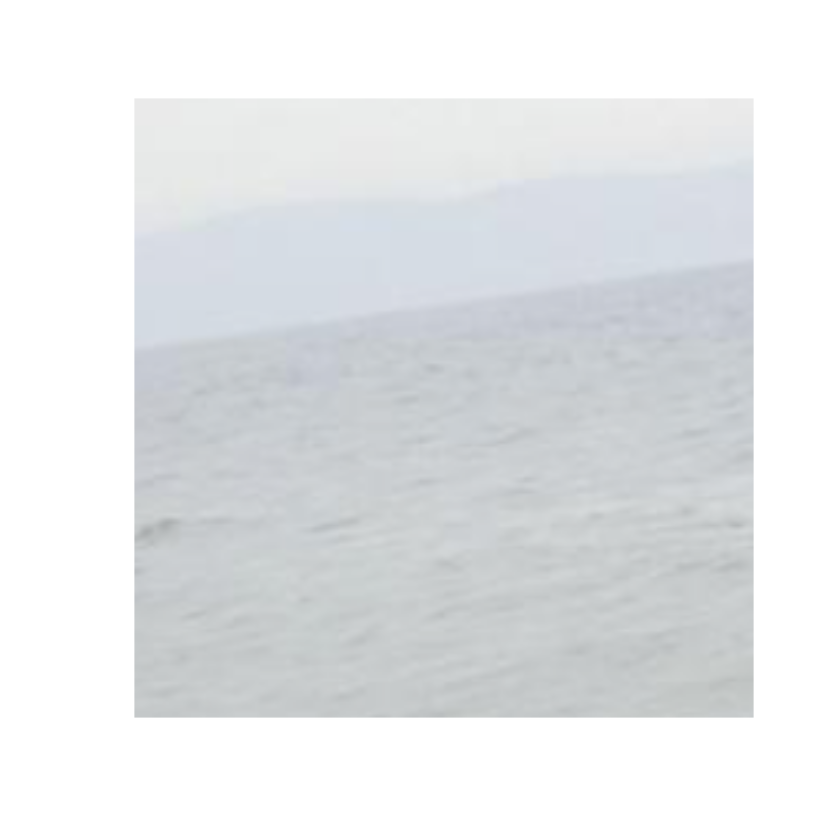

In [46]:
picture1 = image_crop(myimg2_RGB, "224x224+50+50")
plot(picture1)
picture1 = as.integer(picture1[[1]])
#drop the extra channel for comparision
picture1 = picture1[,,-4] 
picture1 = array_reshape(picture1, 
                         c(1, dim(picture1)))
picture1 = imagenet_preprocess_input(picture1)

In [47]:
preds1 = model_resnet50 %>% predict(picture1)
imagenet_decode_predictions(preds1, top = 3)[[1]]

class_name,class_description,score
<chr>,<chr>,<dbl>
n09421951,sandbar,0.07926153
n04347754,submarine,0.04810236
n02066245,grey_whale,0.04798749


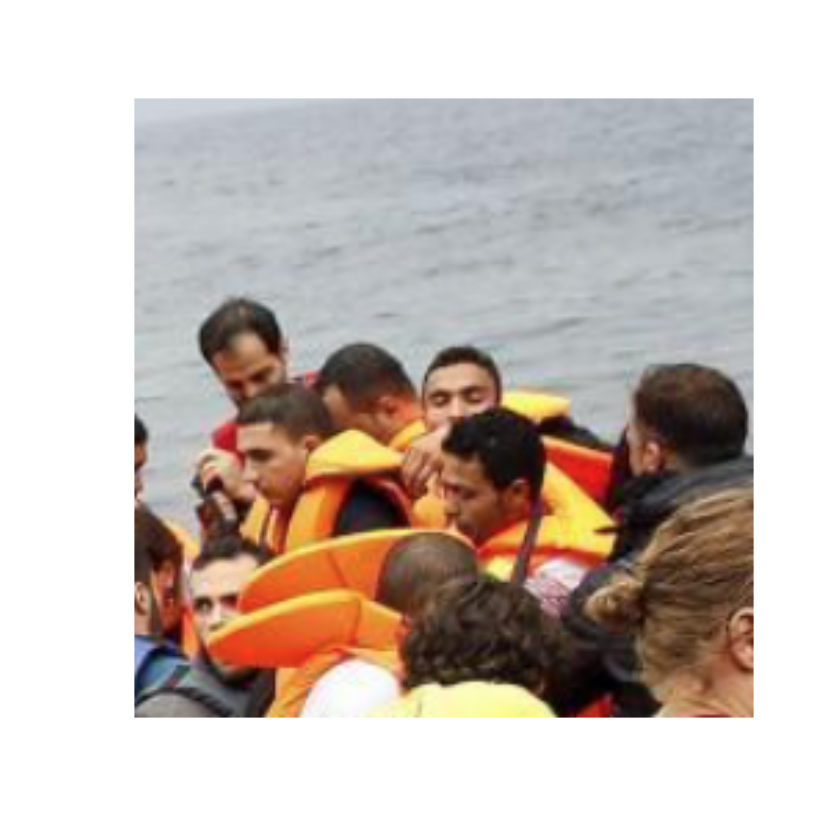

In [48]:
picture2 = image_crop(myimg2_RGB, "224x224+1000")
plot(picture2)
picture2 = as.integer(picture2[[1]])
#drop the extra channel for comparision
picture2 = picture2[,,-4] 
picture2 = array_reshape(picture2,
                         c(1, dim(picture2)))
picture2 = imagenet_preprocess_input(picture2)

In [49]:
preds2 = model_resnet50 %>% predict(picture2)
imagenet_decode_predictions(preds2, top = 3)[[1]]

class_name,class_description,score
<chr>,<chr>,<dbl>
n03662601,lifeboat,0.39761350
n04273569,speedboat,0.11085811
n02704792,amphibian,0.06916212


### 15.3 Using existing libraries and APIs